In [19]:
import sys
sys.path.append('../../../Scripts/')

In [20]:
import text_preprocessing as tp
import baseline_model as base
import plots as pl
import pandas as pd, numpy as np

In [21]:
path = '../Data/'

## Data

In [22]:
train = pd.read_csv(f'{path}train.csv')
test = pd.read_csv(f'{path}test.csv')

## Preprocessing

In [23]:
prep = tp.Preprocessing('english')

In [24]:
train_prep = prep.main_preprocess(train, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = True,
                                translate_emojis = False,
                                whitelist = "")

In [25]:
test_prep = prep.main_preprocess(test, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = True,
                                translate_emojis = False,
                                whitelist = "")

## Baseline

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [27]:
target_names = ['self-negative', 'self-positive', 'future-negative', 
                'future-positive', 'world-negative', 'world-positive']

seed = 42

### Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.79


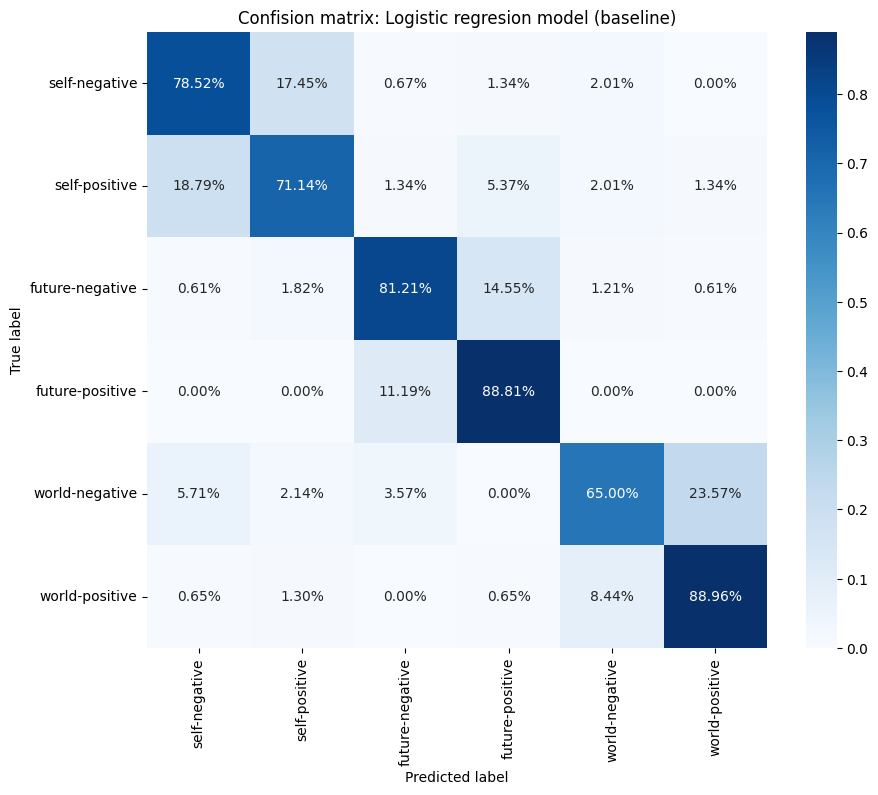

In [28]:
lr = LogisticRegression(random_state=seed)
b = base.Baseline(model=lr, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Logistic Regression', 
                target_names=target_names)

model_lr, vectorizer_lr, metrics_lr = b.baseline()

plot_lr = pl.Plots(metrics_lr)
plot_lr.plot_confusion_matrix(title='Confision matrix: Logistic regresion model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [29]:
print(metrics_lr[0])

                 precision    recall  f1-score   support

  self-negative       0.75      0.79      0.77       149
  self-positive       0.76      0.71      0.73       149
future-negative       0.85      0.81      0.83       165
future-positive       0.78      0.89      0.83       143
 world-negative       0.81      0.65      0.72       140
 world-positive       0.79      0.89      0.84       154

       accuracy                           0.79       900
      macro avg       0.79      0.79      0.79       900
   weighted avg       0.79      0.79      0.79       900



### Random forest

Model: Random forest(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.75


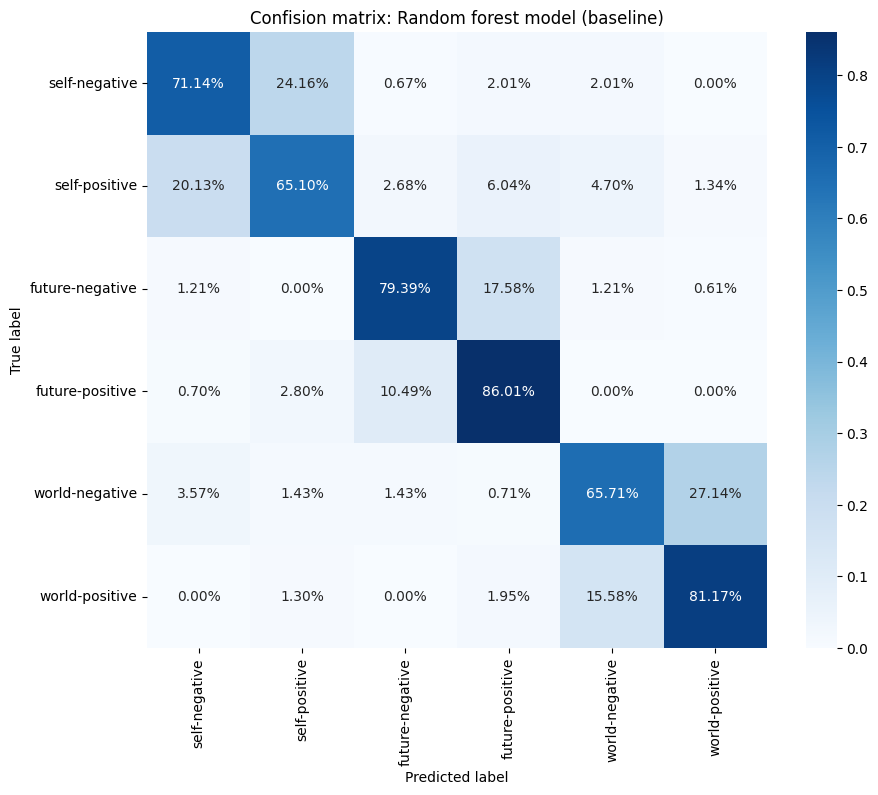

In [30]:
rf = RandomForestClassifier(random_state=seed)
b = base.Baseline(model=rf, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Random forest', 
                target_names=target_names)

model_rf, vectorizer_rf, metrics_rf = b.baseline()

plot_rf = pl.Plots(metrics_rf)
plot_rf.plot_confusion_matrix(title='Confision matrix: Random forest model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [31]:
print(metrics_rf[0])

                 precision    recall  f1-score   support

  self-negative       0.74      0.71      0.72       149
  self-positive       0.69      0.65      0.67       149
future-negative       0.86      0.79      0.82       165
future-positive       0.73      0.86      0.79       143
 world-negative       0.72      0.66      0.69       140
 world-positive       0.75      0.81      0.78       154

       accuracy                           0.75       900
      macro avg       0.75      0.75      0.75       900
   weighted avg       0.75      0.75      0.75       900



### Decision tree

Model: Decision tree(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.69


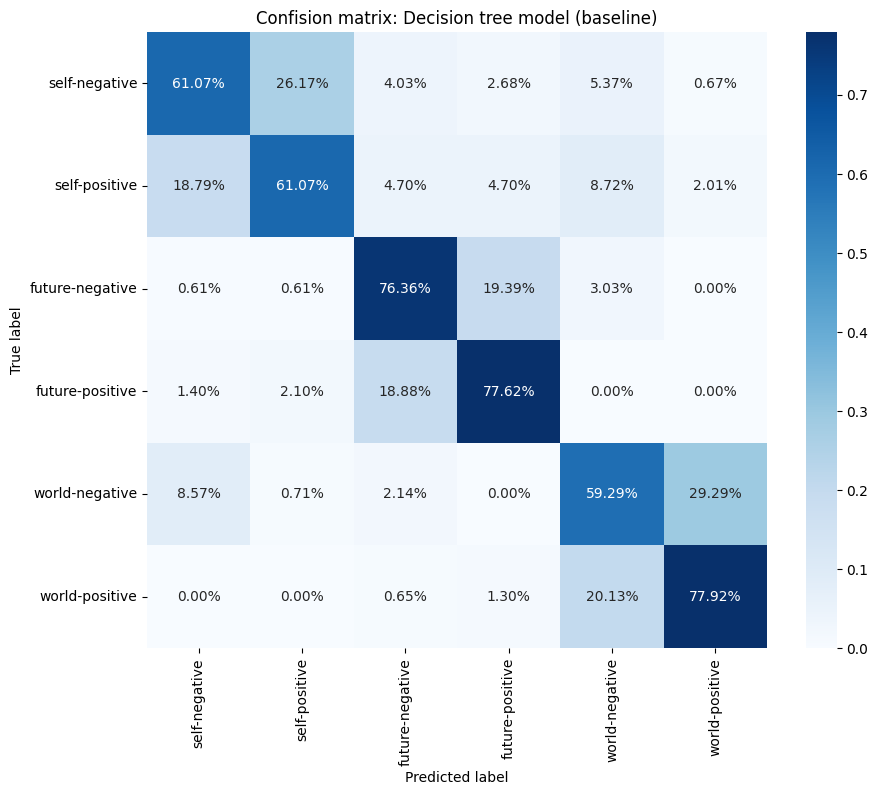

In [32]:
dt = DecisionTreeClassifier(random_state=seed)
b = base.Baseline(model=dt, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Decision tree', 
                target_names=target_names)

model_dt, vectorizer_dt, metrics_dt = b.baseline()

plot_dt = pl.Plots(metrics_dt)
plot_dt.plot_confusion_matrix(title='Confision matrix: Decision tree model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [33]:
print(metrics_dt[0])

                 precision    recall  f1-score   support

  self-negative       0.68      0.61      0.64       149
  self-positive       0.67      0.61      0.64       149
future-negative       0.74      0.76      0.75       165
future-positive       0.71      0.78      0.74       143
 world-negative       0.59      0.59      0.59       140
 world-positive       0.73      0.78      0.75       154

       accuracy                           0.69       900
      macro avg       0.69      0.69      0.69       900
   weighted avg       0.69      0.69      0.69       900



### SVM

Model: SVM(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.79


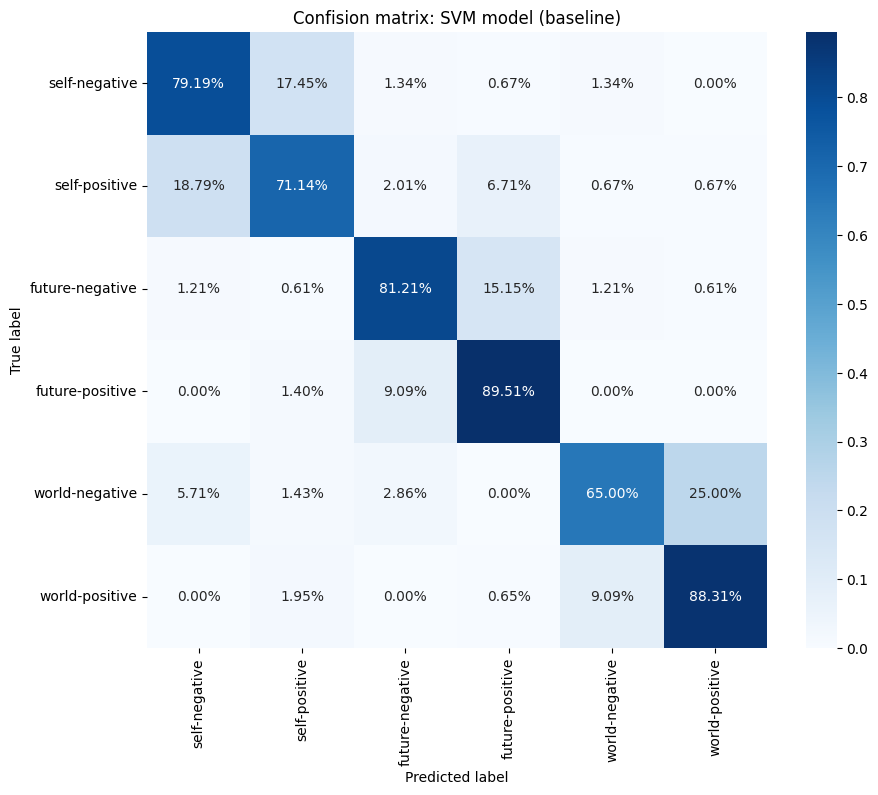

In [34]:
svm = SVC(random_state=seed)
b = base.Baseline(model=svm, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='SVM', 
                target_names=target_names)

model_svm, vectorizer_svm, metrics_svm = b.baseline()

plot_svm = pl.Plots(metrics_svm)
plot_svm.plot_confusion_matrix(title='Confision matrix: SVM model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)

In [35]:
print(metrics_svm[0])

                 precision    recall  f1-score   support

  self-negative       0.76      0.79      0.77       149
  self-positive       0.76      0.71      0.73       149
future-negative       0.86      0.81      0.83       165
future-positive       0.78      0.90      0.83       143
 world-negative       0.83      0.65      0.73       140
 world-positive       0.79      0.88      0.83       154

       accuracy                           0.79       900
      macro avg       0.79      0.79      0.79       900
   weighted avg       0.79      0.79      0.79       900

